# NLP Toolkits and Preprocessing Exercises

## Introduction

Acknowledgement: This notebook is adapted from  Intel AI Developer Program

We will be using [review data from Kaggle](https://www.kaggle.com/snap/amazon-fine-food-reviews) to practice preprocessing text data. 

The dataset contains user reviews for many products, but today we'll be focusing on the product in the dataset that had the most reviews - an oatmeal cookie. 

The following code will help you load in the data. If this is your first time using nltk, you'll to need to pip install it first.

In [1]:
import nltk
import pandas as pd

In [9]:
data = pd.read_csv('../assets/cookie_reviews.csv')
data.head(9)

,user_id,stars,reviews
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healt...
1,A1JAPP1CXRG57A,5,Quaker Soft Baked Oatmeal Cookies with raisins...
2,A2Z9JNXPIEL2B9,5,I am usually not a huge fan of oatmeal cookies...
3,A31CYJQO3FL586,5,I participated in a product review that includ...
4,A2KXQ2EKFF3K2G,5,My kids loved these. I was very pleased to giv...
5,A2U5TAIAQ675BL,5,I really enjoyed these individually wrapped bi...
6,A1R4PIBZBD3NZ0,4,I was surprised at how soft the cookie was. I ...
7,A1ECQ8LJMXG4WI,5,Filled with oats and raisins you'll love this ...
8,A3MSG4E5MLI1XP,5,"I was recently given a complimentary ""vox box""..."


### Get a general understanding of the data

Generally, before we start to work on the data, it will be good to get a general appreciation
of the shape of the data. We can for example try to seek answers to the following questions.
* How many reviews there are in total.
* What is the percent of 1, 2, 3, 4 and 5 star reviews.
* What is distribution of character lengths for the reviews, by listing the values and by plotting a histogram.

In [17]:
# There are 913 reviews total
len(data)

913

In [18]:
# This cookie got great reviews overall, with 68% of users giving it 5 stars
data.stars.value_counts(normalize=True)

5    0.683461
4    0.237678
3    0.061336
2    0.013143
1    0.004381
Name: stars, dtype: float64

In [19]:
# This tells us that there were 10 reviews that had 134 characters
data.reviews.map(len).value_counts().head()

134    10
157     9
137     8
107     8
132     8
Name: reviews, dtype: int64

In [20]:
# Import seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set_palette('dark')
sns.set_context('talk')

%matplotlib inline

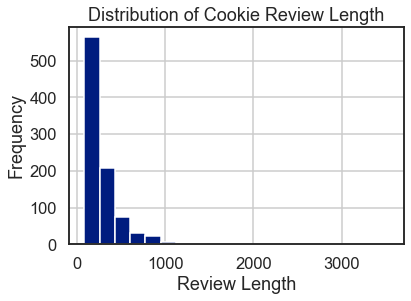

In [21]:
# This creates a histogram of all of the review lengths
ax = data.reviews.map(len).hist(bins=20)
ax.set(xlabel='Review Length', ylabel='Frequency', title='Distribution of Cookie Review Length');

- Now, let's take a look at the review itself.
- We can use data.head() and data.tail() to see the first 5 and last 5 rows of the data

In [22]:
data.head()

,user_id,stars,reviews,test
0,A368Z46FIKHSEZ,5,I love these cookies! Not only are they healt...,
1,A1JAPP1CXRG57A,5,Quaker Soft Baked Oatmeal Cookies with raisins...,
2,A2Z9JNXPIEL2B9,5,I am usually not a huge fan of oatmeal cookies...,
3,A31CYJQO3FL586,5,I participated in a product review that includ...,
4,A2KXQ2EKFF3K2G,5,My kids loved these. I was very pleased to giv...,


In [23]:
data.tail()

,user_id,stars,reviews,test
908,A366PSH7KFLRPB,5,I loved these cookies and so did my kids. You ...,
909,A2KV6EYQPKJRR5,5,This is a great tasting cookie. It is very sof...,
910,A3O7REI0OSV89M,4,These are great for a quick snack! They are sa...,
911,A9JS5GQQ6GIQT,5,I love the Quaker soft baked cookies. The rea...,
912,AMAVEZAGCH52H,5,This cookie is really good and works really we...,


In [19]:
# The dataframe contains data starting with row index 0. There are three columns, the last one is at col #2
# To see a review for row 10, we use data.iloc[1,2]
data.iloc[9,2]

'the best and freshest cookie that comes in a package, we ate them up, wishing we had more. soo good'

## Question 1 

#### TODO
- Write a for-loop to print out the the review
- What do  you notice about the "structure" of the the review text. 
- What non-English terms do you observe hint: look at data.iloc[i,2]

In [ ]:
# Your codes

## Question 2 ##
Apply the following preprocessing steps:

     1. Remove all words that contain numbers 
     2. Make all the text lowercase 
     3. Remove punctuation 
     4. Remove HTML tags such as BR
     5. Tokenize the reviews into words
     
Hint #1: Use re and nltk
  
Hint #2: The cookie review in the second row has numbers, upper case letters and punctuation. You can use it to test out your regular expressions.



In [ ]:
# This review needs to be heavily-cleaned
data.iloc[1,2]

#### TODO
* Remove words containing numbers and replace with a single space (use regular expresson)
* Then, update the dataframe column(series) reviews with the new 
* Finally, convert to lower cases

In [ ]:
# Your codes

 #### TODO
 * Insert your codes to remove all punctuations. 
 * Check if the text in data.iloc[1,2] is looking cleaner now

In [ ]:
# Your codes

In [ ]:
# This is the review after cleaning
data.iloc[1,2]

#### TODO
- Remove HTML tags such as  BR 


In [ ]:
# Your codes

In [ ]:
# The review is starting to look pretty good!
data.iloc[1,2]

#### TODO
Finally, you can tokenize the reviews into words.
- Use nltk to perform the word tokenization
- insert the list of tokens into a new column (series) call tokens

In [ ]:
# Your codes

### Get a general understanding of the tokens (words)
Do not make changes to the cells below. These codes will give you a feel of the text.

* Find the most common words.
* Determine the word length distribution over the entire corpus.
* The solution is given below, It assumes that the tokens are found in the column token.

In [ ]:
# This creates one huge list by combining all of the tokens values
word_list = sum(data.tokens.tolist(), [])
word_list[:10]

In [ ]:
# These are the steps to find the most common words

from collections import Counter

# Converts list to a dictionary with value counts
word_counts = Counter(word_list)

# Reverse the key/values in the dictionary for sorting
word_counts = list(zip(word_counts.values(), word_counts.keys()))

# Sort the list by count
word_counts = sorted(word_counts, reverse=True)

# Prints the 10 most commons words
word_counts[:10]

In [ ]:
# The distribution of word lengths
word_lengths = pd.Series([len(x) for x in word_list])

ax = word_lengths.hist(bins=15)
ax.set(xlabel='Word Lengths', ylabel='Frequency', title='Distribution of Word Length');

## Question 3 ##

* Apply the following preprocessing techniques:

     * Remove stopwords
     * Perform  lemmatization [skip stemming]
     * Perform  lemmization considering parts of speech tagging [optional]
     
  Recommendation: Create a new column in your data set for every preprocessing technique you apply, so you can see the progression of the reviews text.

#### TODO
- Remove stop words

In [ ]:
# Your codes

#### TODO 
* Perform  basic lemmatization without POS labelling

In [ ]:
# Your codes

#### TODO (optional)
Lemmitization can be more accurate if Part of Speech (POS) information is available.
The general steps are:
- First, perform parts of speech tagging on the review
- Second, convert POS labels to something that can be recognize by Wordnet
- Third, apply lemmitization
- 
##### Perform lemmatization considering parts of speech tagging


In [ ]:
# Your codes
# Parts of speech tagging on the review

In [ ]:
# convert POS labels to something that can be recognize by Wordnet

from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

# The function is given below. Do not change it.
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return "a"
    elif treebank_tag.startswith('V'):
        return "v"
    elif treebank_tag.startswith('N'):
        return "n"
    elif treebank_tag.startswith('R'):
        return "r"
    else:
        return "n"

In [2]:
# Your codes
# Apply lemmization


## Question 4 ##

After going through these preprocessing steps, what are the most common words now? Do they make more sense?


#### TODO:
You can reuse the codes from the section "Get a general understanding of the tokens (words)"

In [ ]:
# Your codes

In [ ]:
## End ##